In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')

data_calls.info()
display(data_calls.head(10))
data_internet.info()
display(data_internet.head(10))
data_messages.info()
display(data_messages.head(10))
data_tariffs.info()
display(data_tariffs.head(10))
data_users.info()
display(data_users.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Добрый день!
Импортируем бибилиотеки pandas и matplotlib для дальнейшей работы с ними.
Присваиваем каждому файлу переменную, ориентируясь на название.
Выводим данные на экран и изучаем общую информацию.

In [3]:
data_calls['call_date'] = pd.DatetimeIndex(data_calls['call_date']).month
data_calls.columns = ['call_id', 'month', 'duration', 'user_id']

data_internet['session_date'] = pd.DatetimeIndex(data_internet['session_date']).month
data_internet = data_internet.drop(columns=['Unnamed: 0']) 

data_internet['mb_used'] = np.ceil((data_internet['mb_used'] / 1000).round(2))
data_internet.columns = ['session_id', 'gb_used', 'month', 'user_id']

data_messages['message_date'] = pd.DatetimeIndex(data_messages['message_date']).month
data_messages.columns = ['message_id', 'month', 'user_id']

data_users['churn_date'] = data_users['churn_date'].fillna(value = 'Действует')

Из столбца с датами выбираем месяц т.к. для исследования нас интересует только он и записываем поверх дат.
Удаляем столбец Unnamed: 0 т.к. он не несет смысловой нагрузки.
Переводим мб в гб и округляем до 2 знаков после запятой.
Пропущенные значения в столбце "churn_date" меняем на "Действует" в соответствии с условием.


In [4]:
data_calls.query('duration == 0.0')

data_calls = data_calls[data_calls['duration'] > 0]
data_calls['duration'] = np.ceil(data_calls['duration'].astype(int))

calls = data_calls.groupby(['user_id', 'month']).agg({'duration': 'sum', 'call_id': 'count'}).sort_values(by = ['user_id', 'month']).reset_index()




В данных с продолжительностью звонков присутствуют значения 0.0 в количестве 39613. Я предлагаю удалить не учитывать данные случаи
т.к. они не помогут в ответе на вопросы о израсходованных минутах по месяцам и никак не повлияют на расчет остатков по тарифам.

In [5]:
calls = data_calls.groupby(['user_id', 'month']).agg({'duration': 'sum', 'call_id': 'count'}).sort_values(by = ['user_id', 'month']).reset_index()

messages = data_messages.groupby(['user_id', 'month']).agg({'message_id': 'count'}).reset_index()

internet = data_internet.groupby(['user_id', 'month']).agg({'gb_used': 'sum'}).reset_index()



Делаем группировку по пользователям и месяцам с количеством сделанных звонков и израсходованных минут разговора. Также сортируем полученные данные по убыванию.

Делаем группировку по пользователям и месяцам с количеством отправленных сообщений.

Делаем группировку по пользователям и месяца с объемом израсходованного интернет-трафика.


In [6]:
c_m = pd.merge(calls, messages, on = ['user_id', 'month'], how = 'outer')
c_m_i = pd.merge(c_m, internet, on = ['user_id', 'month'], how = 'outer').reset_index(drop= True)

c_m_i = c_m_i.fillna(value= 0)

Выполняем слияние таблиц по общим столбцам с указанием id пользователей и месяцем с информацие по звонкам, сообщениям и интернету в единую таблицу. 

Заменяем у пользователей, которые не использовали интернет/ звонки/ сообщения, NaN на 0 -е значение.

In [7]:
data_users.columns = ['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff_name']

users_main = pd.merge(data_users, data_tariffs, how = 'outer', on = ['tariff_name'])


Переименуем столбец с указанием тарифа, чтобы после было проще при объединении таблиц.

Объединяем таблицу тарифов и таблицей пользователей посредством общего столбца с названием тарифа.

In [8]:
main_data = pd.merge(users_main, c_m_i, how = 'outer', on = ['user_id'])

main_data = main_data.dropna()

Создаем единую таблицу на основе id пользователей.

После объединения таблиц воедино были обнаружен два пользователя (id 1128 и 1371. Ксения Агаева и Ириней Трофимов),по которым нет записей по расходуемым ими ресурсам. Либо это ошибка выгрузки либо данные пользователи ни разу не воспользовались услугами "Мегалайна". Данные по обоим пользователям были удалены из итоговой таблицы.

In [9]:
def o_m(row):
    if (row['tariff_name'] == 'ultra') & (row['duration'] > row['minutes_included']):
        return row['duration'] - row['minutes_included']
    elif (row['tariff_name'] == 'smart') & (row['duration'] > row['minutes_included']):
        return row['duration'] - row['minutes_included']
    else:
        return 0


main_data['overrun_min'] = main_data.apply(o_m, axis = 1)

def o_msg(row):
    if (row['tariff_name'] == 'ultra') & (row['message_id'] > row['messages_included']):
        return row['message_id'] - row['messages_included']
    elif (row['tariff_name'] == 'smart') & (row['message_id'] > row['messages_included']):
        return row['message_id'] - row['messages_included']
    else:
        return 0

main_data['overrun_message'] = main_data.apply(o_msg, axis = 1)

def o_gb(row):
    if (row['tariff_name'] == 'ultra') & (row['gb_used'] > (row['mb_per_month_included'] / 1000)):
        return row['gb_used'] - (row['mb_per_month_included'] / 1000)
    elif (row['tariff_name'] == 'smart') & (row['gb_used'] > (row['mb_per_month_included'] / 1000)):
        return row['gb_used'] - (row['mb_per_month_included'] / 1000)
    else:
        return 0
    
    
main_data['overrun_gb'] = main_data.apply(o_gb, axis = 1)

def gain_func(row):
    return (row['overrun_min'] * row['rub_per_minute']) \
           + (row['overrun_message'] * row['rub_per_message']) \
           + (row['overrun_gb'] * row['rub_per_gb']) + row['rub_monthly_fee']

main_data['gain'] = main_data.apply(gain_func, axis= 1)

Пишем функцию, которая считает перерасход минут, входящих в тариф, и записывает их в отдельный столбец.

Пишем функцию, которая считает перерасход сообщений, входящих в тариф, и записывает их в отдельный столбец.

Пишем функцию, которая считает перерасход гб, входящих в тариф, и записывает их в отдельный столбец.

Пишем функцию, которая суммирует перерасход по минутам, сообщениям и гигабайтам, а также добавляет к ниму абонентскую плату за месяц и записывает в отдельный столбец.


In [10]:
final_data = main_data.loc[:,['user_id', 'age', 'churn_date', 'city', 'tariff_name',
       'month', 'duration', 'call_id', 'message_id', 'gb_used', 'overrun_min', 'overrun_message', 'overrun_gb', 'gain']]

ultra_final_data = final_data.query('tariff_name == "ultra"')

smart_final_data = final_data.query('tariff_name == "smart"')

Уменьшим размер таблицы убрав лишние столбцы.

Разбиваем финальную таблицу на две(в соответствии с тарифом) для дальнейшего анализа.

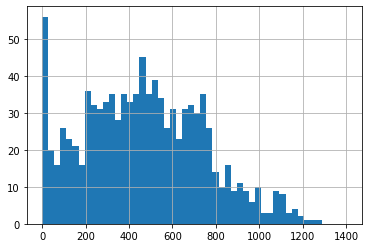

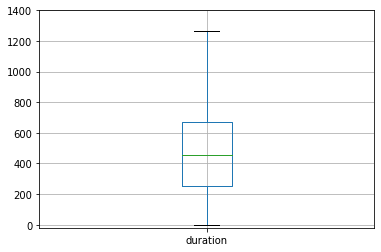

In [11]:
ultra_final_data['duration'].hist(bins = 50, range = (0, 1400))
plt.show()
ultra_final_data.boxplot('duration')
plt.ylim(-20, 1400)
plt.show()

Есть несколько выбросов на после 1400, которые мы отсекли.В среднем продолжительность разговоров пользователей составляет 467 мин. что примерно равно медианому значению.

In [12]:
np.std(ultra_final_data['duration']) 
np.var(ultra_final_data['duration'])
ultra_final_data['duration'].mean()

467.9238578680203

Посчитаем стандартное отклонение, среднее, дисперсию.При извлечении квадратного корня из дисперсии получаем значение 282.51 (соответствует стандартному отклонению).


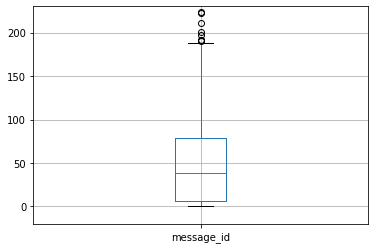

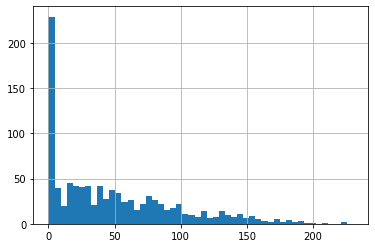

In [13]:
ultra_final_data.boxplot('message_id')
plt.ylim(-20, 230)
plt.show()
ultra_final_data['message_id'].hist(bins = 50, range = (0, 230))

plt.show()

Среднее количество сообщений, рассылаемое пользователями тарифы ultra примерно равно 49 в месяц.
Медианное значение при этом равно 38 сообщений в месяц.
Большинству же пользователей хватает всего пары сообщений в месяц. Границы первого квартиля тому подтверждение.

In [14]:
np.std(ultra_final_data['message_id']) 
np.var(ultra_final_data['message_id']) 
np.sqrt(np.var(ultra_final_data['message_id']))
ultra_final_data['message_id'].mean()

49.36345177664975

Посчитаем стандартное отклонение, среднее значение и дисперсию.

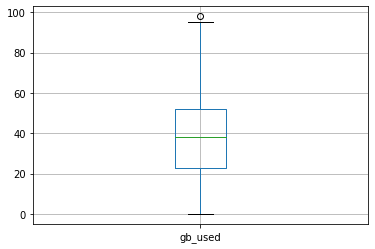

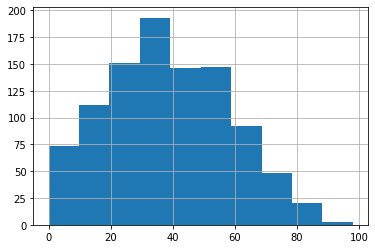

In [15]:
ultra_final_data.boxplot('gb_used')
plt.show()
ultra_final_data['gb_used'].hist(bins = 10)
plt.show()

Большинство пользователей тарифа ultra укладываются в предоставленные 30 гб трафика.
По графику нормального распределения распределения видно, что оснаявная плотность частот приходится на промежуток от 11 до 26 гб.
Среднее значение практически совпадает с медианным.

In [16]:
np.std(ultra_final_data['gb_used'])
np.var(ultra_final_data['gb_used'])
np.sqrt(np.var(ultra_final_data['gb_used']))

19.612141644240197

Посчитаем стандартное отклонение, среднее значение и дисперсию.

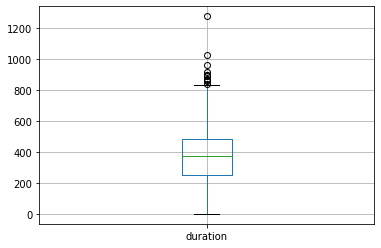

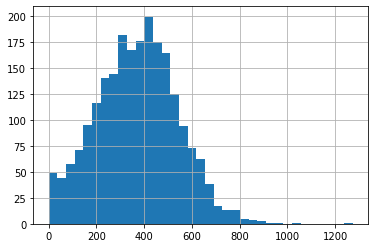

In [17]:
smart_final_data.boxplot('duration')
plt.show()
smart_final_data['duration'].hist(bins = 35)
plt.show()

Позьзователи тарифа smart практически полностью расходуют включенные 500 минут в месяц.
В среднем расходуется по 371 минуте.

In [18]:
np.std(smart_final_data['duration'])
np.var(smart_final_data['duration'])
np.sqrt(np.var(smart_final_data['duration']))
smart_final_data['duration'].mean()

371.4441453566622

Посчитаем стандартное отклонение, среднее значение и дисперсию.

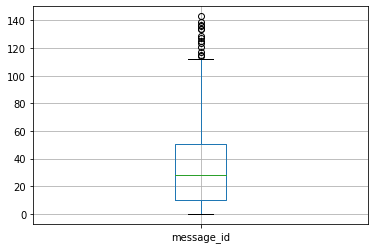

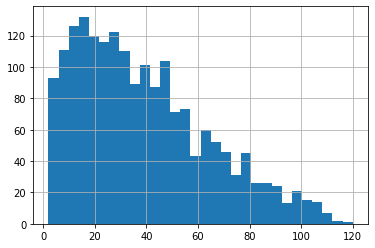

In [19]:
smart_final_data.boxplot('message_id')
plt.show()
smart_final_data['message_id'].hist(bins = 30, range = (2,120))
plt.show()

Получившийся график обладачет положительной скошенностью,чему свидетельствует то что среднее значение в 33 сообщения в месяц больше 28 медианного.
Есть и пользователи, которым хватает и пары сообщений в месяц, но не редки случаи с превышением включенных 50 сообщений.

In [20]:
np.std(smart_final_data['message_id'])
np.var(smart_final_data['message_id']) 
np.sqrt(np.var(smart_final_data['message_id']))
smart_final_data['message_id'].mean()

33.384028712427096

Посчитаем стандартное отклонение, среднее значение и дисперсию.

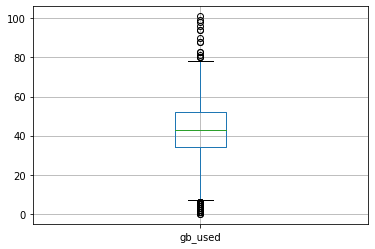

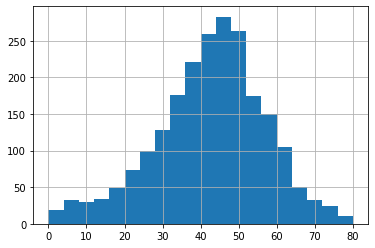

In [21]:
smart_final_data.boxplot('gb_used')
plt.show()

smart_final_data['gb_used'].hist(bins = 20, range = (0, 80))
plt.show()

In [22]:
np.std(smart_final_data['gb_used'])
np.var(smart_final_data['gb_used'])
np.sqrt(np.var(smart_final_data['gb_used']))
smart_final_data['gb_used'].mean()

42.30013458950202

Посчитаем стандартное отклонение, среднее значение и дисперсию.

In [23]:
alpha = 0.05

results_g_1 = st.ttest_ind(
    smart_final_data['gain'],
    ultra_final_data['gain'])

print('p-значение:', results_g_1.pvalue)

if results_g_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.71741294532298e-105
Отвергаем нулевую гипотезу


Гипотеза по средней выручке по тарифам smart и ultra.

Нулевая гипотеза состоит в том, что средняя выручка по тарифам одинакова. Альтернативная гипотеза состоит в том, что результаты по средним выручкам будут отличаются.
По результатам можно видеть, что разница между средними величинами статистически значима. Если судить по p-значение, то разница между средними выручками по тарифам сильно отличается.

In [24]:
moscow_final_data = final_data[final_data['city'] == "Москва"]
except_final_data = final_data[final_data['city'] != "Москва"]

alpha_2 = 0.05

results_g_2 = st.ttest_ind(
    moscow_final_data['gain'],
    except_final_data['gain'])

print('p-значение:', results_g_2.pvalue)

if (results_g_2.pvalue < alpha_2):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.28777410891181254
Не получилось отвергнуть нулевую гипотезу


Гипотеза по отличию средней выручки пользователей из Москвы от выручки пользователей из других регионов.

Нулевая гипотеза состоит в равенстве средней выручки жителей Москвы и других регионов. Алтернативна гипотеза состоит в том, что значения средних величин по выручке будут отличаться.
При таком уровене значимости можно сделать вывод, что с вероятностью 29% значение из выборки по Москве можно также получить и из выборки по регионам и что различие средней выручки между двумя датасетами не особо значительно.


## Общий вывод.
Исходя из полученных в результате иследований данных (в т.ч. получаемой с клинтов выручке), можно сделать вывод, что пользователи тарифного плана "Смарт" хоть и платят меньшую абоненствую плату по сравнению с пользователями тарифа "Ультра", но при этом довольно часто расходуюут ресурсы сверх месячного лимита, тем самым сильно увеличивая месячный счет за пользование услугами "Мегалайна".

Отвечая на вопрос коммерческого департамента, можно сказать, что нужно делать упор именно на тариф "Смарт" и ,соответственно, именно у данного тарифа будет рациональнее увеличить рекламный бюджет.

